# Exploratory Data Analysis (EDA)  & Visualization
- Uncover patterns, trends, relationships

In [1]:
# Import Libraries

# data manipulation and analysis
import pandas as pd

# multi-dimensional arrays and matrices
# mathematical functions
import numpy as np

# parsing & processing Python Source Code
# convert strings of Python code into executable code
import ast # Abstract Syntax Trees (AST) module

# data visualization
import matplotlib.pyplot as plt # creating static, animated, and interactive visualizations
import seaborn as sns # interface for drawing & statistical graphics
import mplcursors # interactive data cursors
import plotly.express as px

# database adapter for Python
import psycopg2 # allows interaction with PostgreSQL
import pandas as pd

# probability distributions and statistical functions
from scipy.stats import norm 
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from tabulate import tabulate

In [2]:
df_2 = pd.read_csv(r'C:\Users\ashwi\Documents\Data Analytics\Portfolio\IGN VIdeo Game Rarings\Python\df_2.csv', index_col=False, delimiter=',')

### summary statistics

In [3]:
summary_stats = df_2.describe()
summary_stats

,score,release_year,release_month,release_day
count,18541.000000,18541.000000,18541.000000,18541.000000
mean,6.951195,2006.517933,7.138342,15.593226
std,1.712020,4.582254,3.476521,8.692047
min,0.500000,1970.000000,1.000000,1.000000
25%,6.000000,2003.000000,4.000000,8.000000
50%,7.300000,2007.000000,8.000000,15.000000
75%,8.200000,2010.000000,10.000000,23.000000
max,10.000000,2016.000000,12.000000,31.000000


In [4]:
score_mean = df_2['score'].mean()
score_median = df_2['score'].median()
score_std = df_2['score'].std()

print("Mean score:", score_mean)
print("Median score:", score_median)
print("Standard deviation of score:", score_std)

Mean score: 6.95119464969527
Median score: 7.3
Standard deviation of score: 1.712019600702138


### Correlation Analysis

Correlation Matrix:
                  score  release_year  release_month  release_day
score          1.000000      0.062937       0.007714     0.020756
release_year   0.062937      1.000000      -0.113424     0.017864
release_month  0.007714     -0.113424       1.000000    -0.067914
release_day    0.020756      0.017864      -0.067914     1.000000


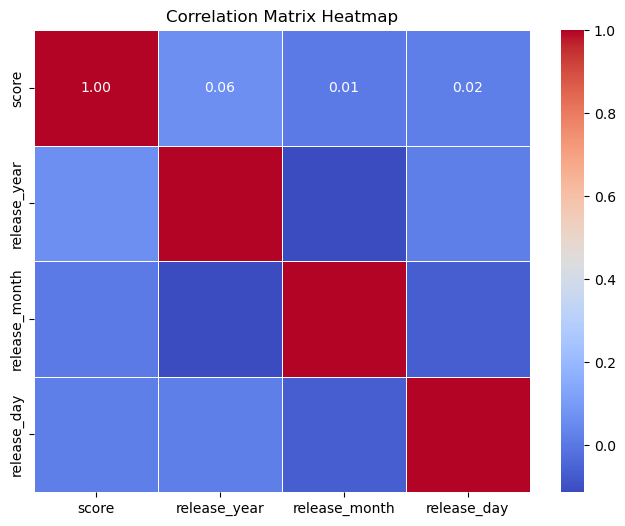

In [5]:
# Select numerical columns for correlation analysis
numerical_columns = ['score', 'release_year', 'release_month', 'release_day']

# Compute the correlation matrix
correlation_matrix = df_2[numerical_columns].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Optional: Visualize the correlation matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

### distribution analysis of scores

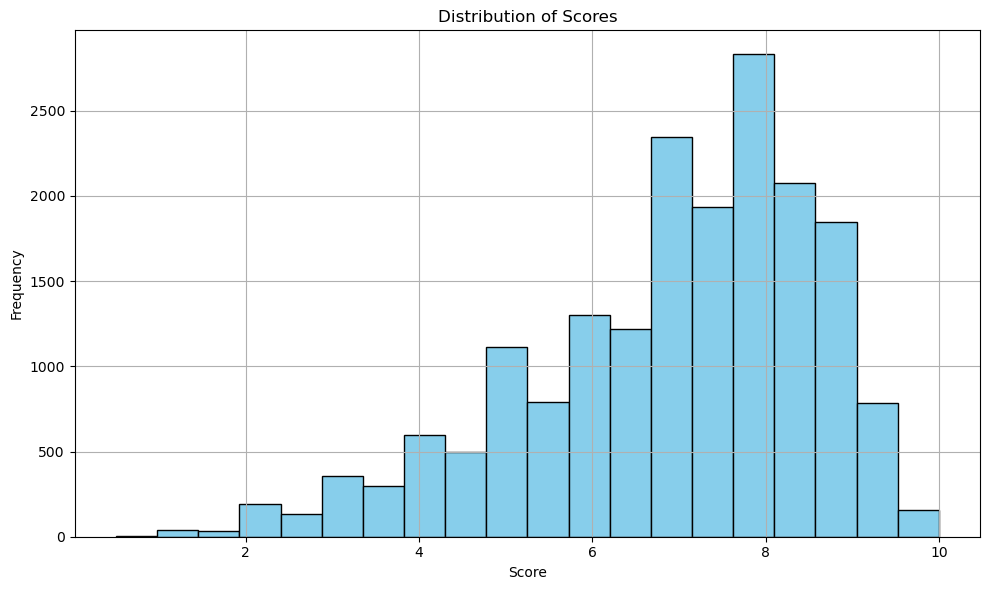

In [6]:
# Plotting the distribution of scores
plt.figure(figsize=(10, 6))
plt.hist(df_2['score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

### Platform and Genre analysis

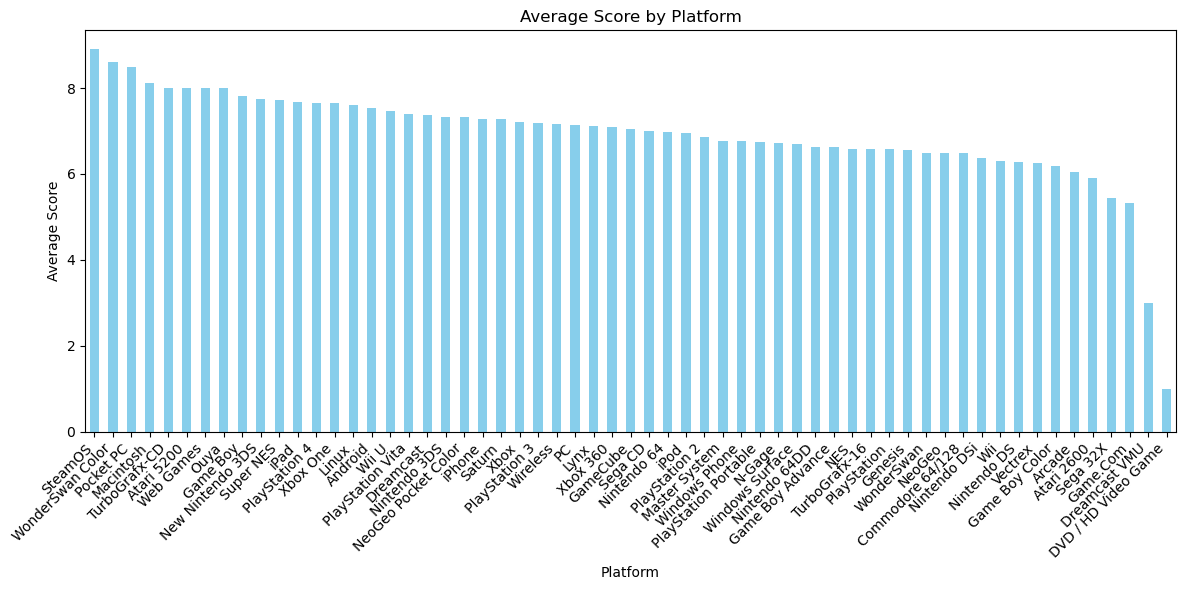

In [7]:
# Calculate the average score for each platform
avg_score_by_platform = df_2.groupby('platform')['score'].mean().sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(12, 6))
avg_score_by_platform.plot(kind='bar', color='skyblue')
plt.title('Average Score by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

### Histogram Visualization of the distribution of Score

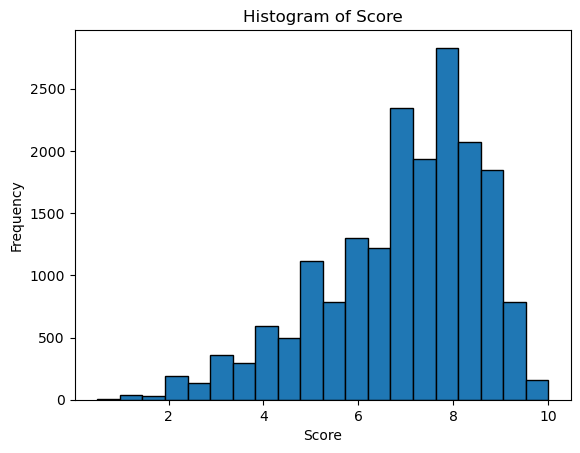

In [8]:
# Plot the histogram with outlined bars
plt.hist(df_2['score'], bins=20, edgecolor='black')  # Set edgecolor to 'black'
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Histogram of Score')
plt.show()

### Scatter Plot Visualization relationship between Release Year vs Score

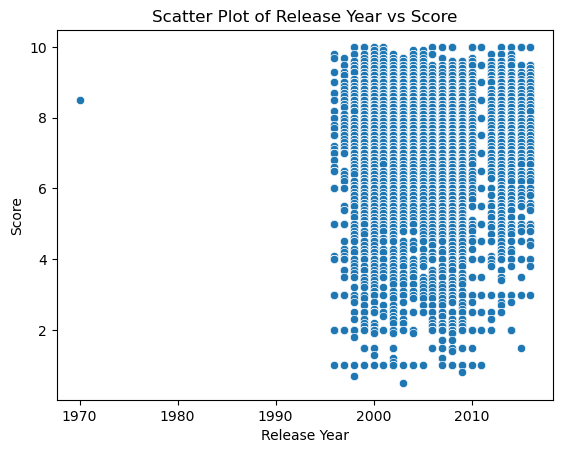

In [9]:
sns.scatterplot(x='release_year', y='score', data=df_2)
plt.xlabel('Release Year')
plt.ylabel('Score')
plt.title('Scatter Plot of Release Year vs Score')
plt.show()

In [10]:
# Filter df_2 for release_year <= 1980
rows_1980_and_before = df_2[df_2['release_year'] <= 1980]

# Display the result
rows_1980_and_before

,title,score,score_phrase,platform,genre,release_year,release_month,release_day
3673,The Walking Dead: The Game -- Episode 1: A New...,8.5,Great,Xbox 360,Adventure,1970,1,1


### Visualization of the relationship between a Score and Genre

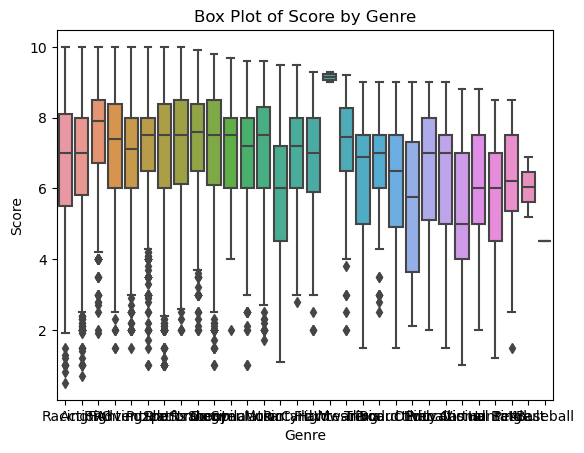

In [11]:
sns.boxplot(x='genre', y='score', data=df_2)
plt.xlabel('Genre')
plt.ylabel('Score')
plt.title('Box Plot of Score by Genre')
plt.show()

### Box Plot or Violin Plot

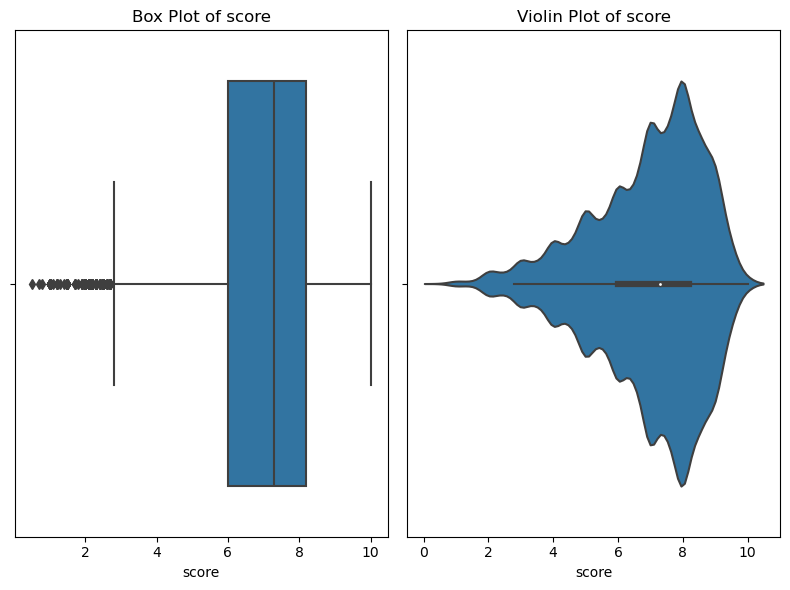

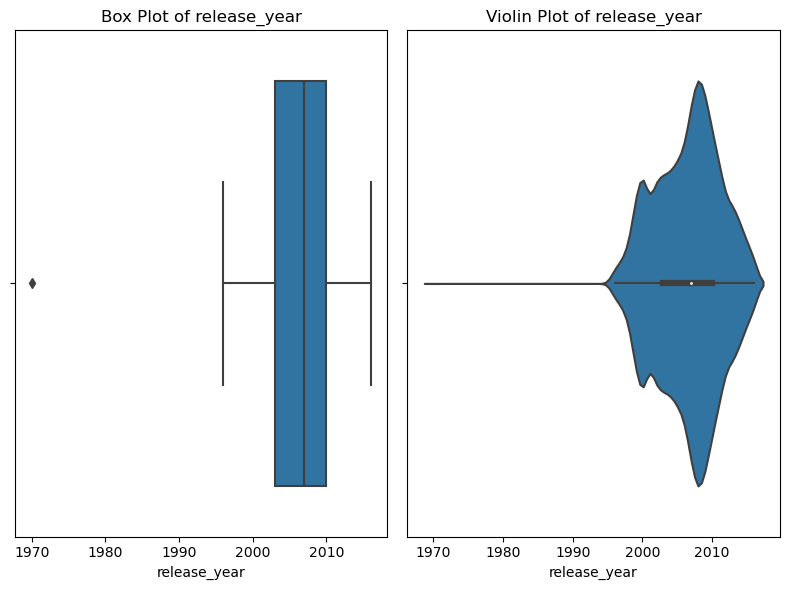

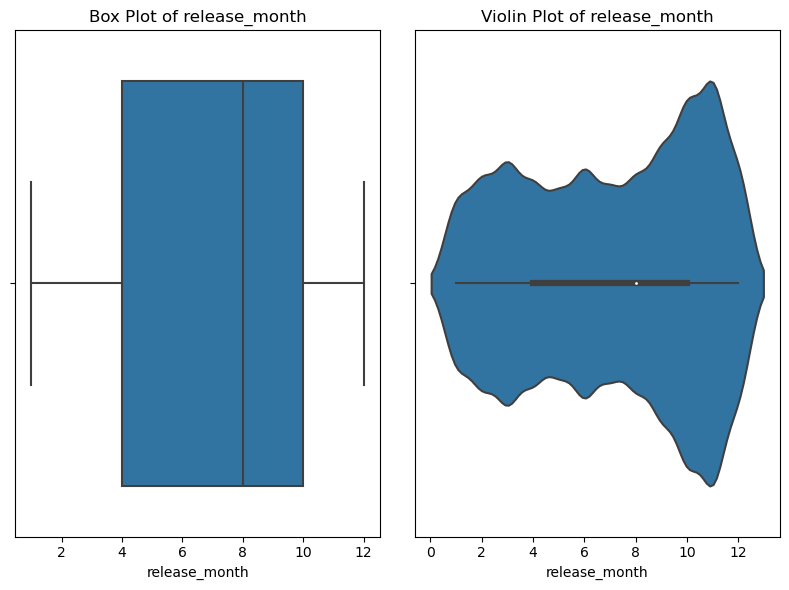

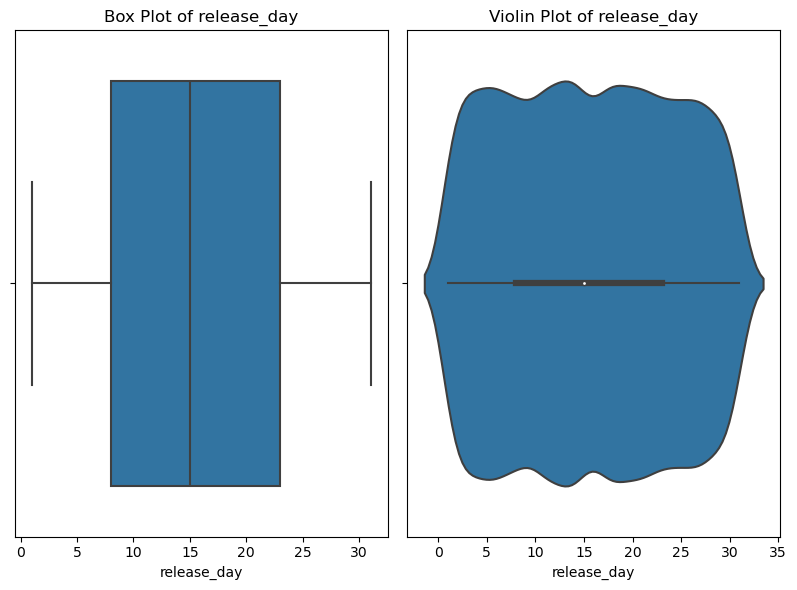

In [12]:
# Selecting numerical columns for plotting
numerical_columns = ['score', 'release_year', 'release_month', 'release_day']

# Create Box Plot and Violin Plot for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df_2[column])
    plt.title('Box Plot of {}'.format(column))
    
    plt.subplot(1, 2, 2)
    sns.violinplot(x=df_2[column])
    plt.title('Violin Plot of {}'.format(column))
    
    plt.tight_layout()
    plt.show()

### Bar Plot for 'Score Phrases'

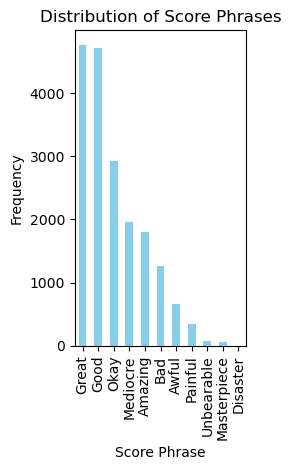

In [13]:
# Bar plot for 'score_phrase'
plt.subplot(1, 3, 1)
df_2['score_phrase'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Score Phrases')
plt.xlabel('Score Phrase')
plt.ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

### Pie Chart of Score Phrases

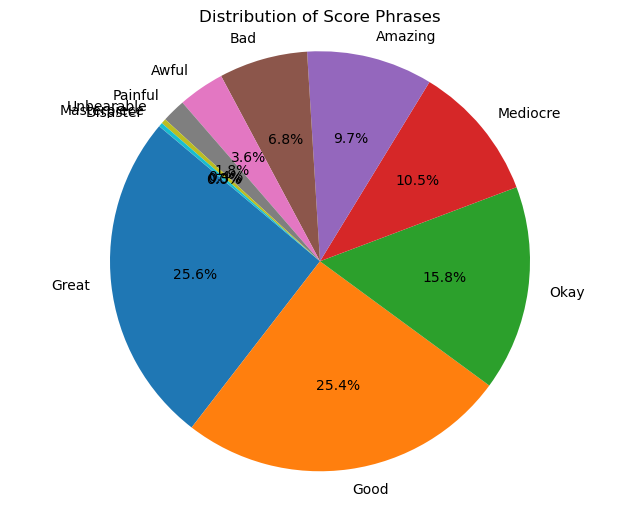

In [14]:
# Define data
score_phrase_counts = df_2['score_phrase'].value_counts()

# Plot pie chart for 'score_phrase' with spread out labels
plt.figure(figsize=(8, 6))
plt.pie(score_phrase_counts, labels=score_phrase_counts.index, autopct='%1.1f%%', startangle=140, labeldistance=1.1)
plt.title('Distribution of Score Phrases')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Line Plot  in Average Scores of Years

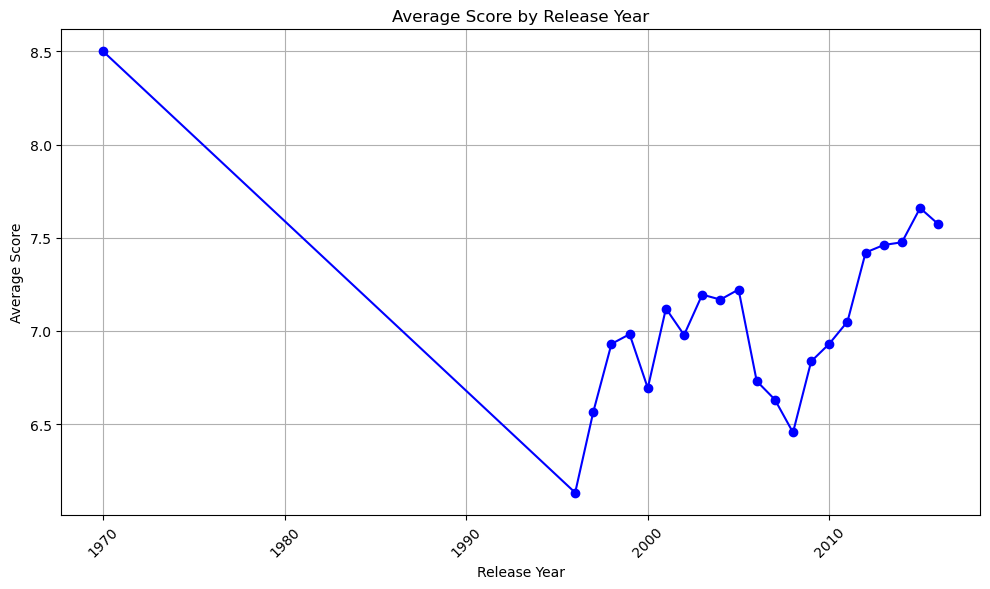

In [15]:
# Calculate the average score for each release year
avg_score_by_year = df_2.groupby('release_year')['score'].mean()

# Plot the data
plt.figure(figsize=(10, 6))
avg_score_by_year.plot(kind='line', marker='o', color='b', linestyle='-')
plt.title('Average Score by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Score')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

### Score Phrase Analysis

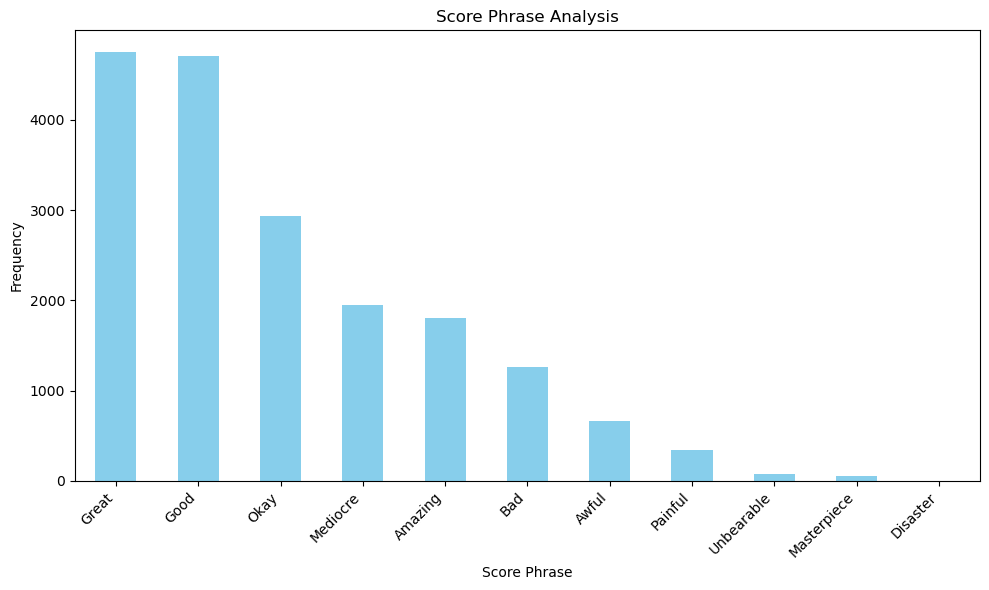

In [16]:
# Count the frequency of each score phrase
score_phrase_counts = df_2['score_phrase'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
score_phrase_counts.plot(kind='bar', color='skyblue')
plt.title('Score Phrase Analysis')
plt.xlabel('Score Phrase')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

### Platform vs. Genre Analysis

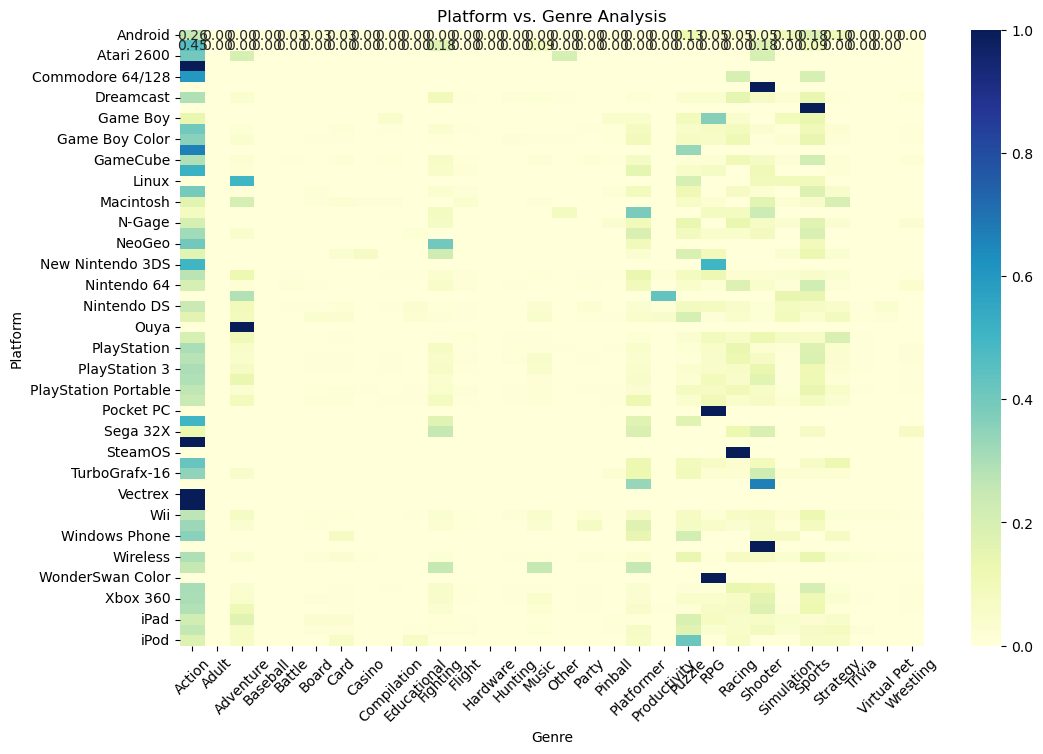

In [17]:
# Define the size of the plot
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(pd.crosstab(df_2['platform'], df_2['genre'], normalize='index'), cmap='YlGnBu', annot=True, fmt=".2f")

# Set plot title and labels
plt.title('Platform vs. Genre Analysis')
plt.xlabel('Genre')
plt.ylabel('Platform')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()